<a href="https://colab.research.google.com/github/TeinkBR/Simulation-Physics-Course/blob/main/Task_01_simulation_method_euler_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you will simulate the trajectory of a cannonball in $2 \mathrm{D}$ until it hits the ground. In order to do so you have to solve Newton's equations of motion:
$$
\begin{aligned}
\frac{\mathrm{d} \mathbf{x}(t)}{\mathrm{d} t} &=\mathbf{v}(t) \\
\frac{\mathrm{d} \mathbf{v}(t)}{\mathrm{d} t} &=\frac{\mathbf{F}(t)}{m}
\end{aligned}
$$
where $\mathrm{x}(t)$ is the position as a function of time $t, m$ is the mass and $\mathbf{F}(t)$ is the force as a function of time.

At time $t=0$, the cannonball (mass $m=2.0 \mathrm{~kg}$ ) has a position of $\mathbf{x}(0)=0$ and a velocity of $\mathbf{v}(0)=(50,50)^{\top} \mathrm{m} \mathrm{s}^{-1}$.

To simulate the cannonball, you will use the simple Euler scheme to propagate the position $\mathrm{x}(t)$ and velocity $\mathrm{v}(t)$ at time $t$ to the time $t+\Delta t(\Delta t=0.1 \mathrm{~s})$ :
$$
\begin{aligned}
&\mathrm{x}(t+\Delta t)=\mathrm{x}(t)+\mathrm{v}(t) \Delta t \\
&\mathrm{v}(t+\Delta t)=\mathrm{v}(t)+\frac{\mathrm{F}(t)}{m} \Delta t
\end{aligned}
$$


$$
y^{\prime}(t)=f(t, y(t)), \quad y\left(t_0\right)=y_0 .
$$
Choose a value $h$ for the size of every step and set $t_n=t_0+n h$. Now, one step of the Euler method from $t_n$ to $t_{n+1}=t_n+h$ is: ${ }^{[3]}$
$$
y_{n+1}=y_n+h f\left(t_n, y_n\right)
$$

In [1]:
## important import
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from pylab import plot, show, xlabel, ylabel

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
# Model parameters
mass_cannon_ball = 1.0          # mass of cannon ball
g = 9.8          # Acceleration due to gravity (m/s^2)

v_x = [50]         #Initial velocity of x direction 
v_y= [50]           # initial velocity of y direction

F_resistance = 100 # force of resistance 
F_resistance_angle=30 # angle of force of resistance

time_step = 1e-1         # time step in seconds(s)

In [3]:
# Initialise the lists for x and y and time
x = [0]
y = [0]
t = [0]                         # Initialize time 
# Decompose forces (gravity and friction by cartesion coordinates)
ax = [-(F_resistance*np.cos(F_resistance_angle/180*np.pi))/mass_cannon_ball]        
ay = [-g-(F_resistance*np.sin(F_resistance_angle/180*np.pi)/mass_cannon_ball)]


t= [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
vx= [50, 41.33974596215561, 32.67949192431122, 24.019237886466833, 15.358983848622445, 6.698729810778058, -1.9615242270663291, -10.621778264910716, -19.282032302755105, -27.942286340599495, -36.602540378443884]


Text(0.5, 0, 'time (s)')

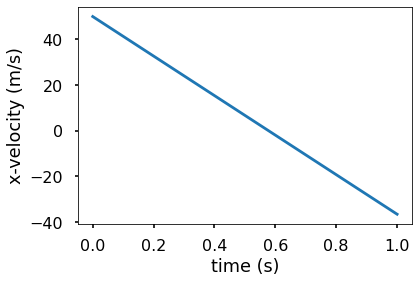

In [4]:
# Use Euler method to update variables
counter = 0
while (counter < 10):
    t.append(t[counter]+time_step)   
    v_x.append(v_x[counter]+time_step*ax[counter])                                       ## velocity change on x dirextion
    v_y.append(v_y[counter]+time_step*ay[counter])                                       ## velocity change on y direction
    x.append(x[counter]+time_step*v_x[counter])                                          ## displacement on x direction
    y.append(y[counter]+time_step*v_y[counter])                                          ## displacement on y direction
    ax.append(-(F_resistance*np.cos(F_resistance_angle/180*np.pi))/mass_cannon_ball)     ## accelaration on x direction
    ay.append(-g-(F_resistance*np.sin(F_resistance_angle/180*np.pi)/mass_cannon_ball))   ## accelaration on y direction          
    
  
   
    
    
    # Increment the counter by 1
    counter = counter+1

# Print the values to check
print ("t=", t)
print ("vx=", v_x)

# Let's plot the velocity against time
plt.plot(t,v_x)
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")


Text(0.5, 0, 'time (s)')

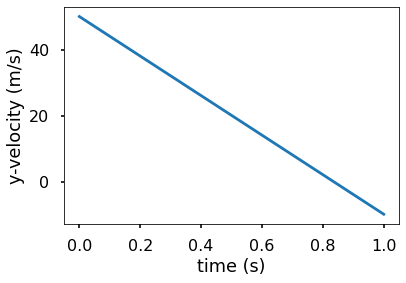

In [5]:
plt.plot(t,v_y)
plt.ylabel("y-velocity (m/s)")
plt.xlabel("time (s)")

Range of projectile is 11.0 m


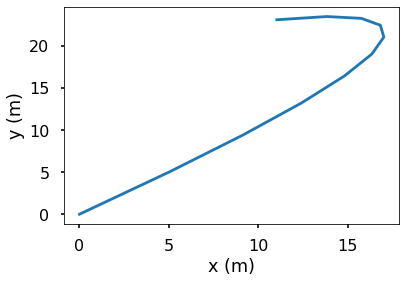

In [8]:
plt.plot(x,y,'-')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
print ("Range of projectile is {:3.1f} m".format(x[counter]))